In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing dataset

## PGA tour data (2010 - 2018)

In [5]:
df = pd.read_csv("C:\\Users\\ryann\\Desktop\\kaggle\\PGA project\\pgaTourData(2010-2018).csv")

In [6]:
df.head()

,Player Name,Rounds,Fairway Percentage,Year,Avg Distance,gir,Average Putts,Average Scrambling,Average Score,Points,Wins,Top 10,Average SG Putts,Average SG Total,SG:OTT,SG:APR,SG:ARG,Money
0,Henrik Stenson,60.0,75.19,2018,291.5,73.51,29.93,60.67,69.617,868,NaN,5.0,-0.207,1.153,0.427,0.960,-0.027,"$2,680,487"
1,Ryan Armour,109.0,73.58,2018,283.5,68.22,29.31,60.13,70.758,"1,006",1.0,3.0,-0.058,0.337,-0.012,0.213,0.194,"$2,485,203"
2,Chez Reavie,93.0,72.24,2018,286.5,68.67,29.12,62.27,70.432,"1,020",NaN,3.0,0.192,0.674,0.183,0.437,-0.137,"$2,700,018"
3,Ryan Moore,78.0,71.94,2018,289.2,68.80,29.17,64.16,70.015,795,NaN,5.0,-0.271,0.941,0.406,0.532,0.273,"$1,986,608"
4,Brian Stuard,103.0,71.44,2018,278.9,67.12,29.11,59.23,71.038,421,NaN,3.0,0.164,0.062,-0.227,0.099,0.026,"$1,089,763"


In [7]:
df.shape

(2312, 18)

# Data Cleaning

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2312 entries, 0 to 2311
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Player Name         2312 non-null   object 
 1   Rounds              1678 non-null   float64
 2   Fairway Percentage  1678 non-null   float64
 3   Year                2312 non-null   int64  
 4   Avg Distance        1678 non-null   float64
 5   gir                 1678 non-null   float64
 6   Average Putts       1678 non-null   float64
 7   Average Scrambling  1678 non-null   float64
 8   Average Score       1678 non-null   float64
 9   Points              2296 non-null   object 
 10  Wins                293 non-null    float64
 11  Top 10              1458 non-null   float64
 12  Average SG Putts    1678 non-null   float64
 13  Average SG Total    1678 non-null   float64
 14  SG:OTT              1678 non-null   float64
 15  SG:APR              1678 non-null   float64
 16  SG:ARG

All fearures have NULL values except for <b>Player name</b> and <b>Year</b>.
<ul>drop the NULL values</ul>

All features are numerical except for <b>Player Name</b>, <b>Points</b>, <b>Money</b>.
<ul><b>Points</b> and <b>Money</b> should be changed to numerical datatype</ul>

In [9]:
# check if all 1678 NON-NULL data points are from the same group 
df_1= df.copy()

In [10]:
# remove NULL values in Fairway Percentage to verify
df_1 = df_1.dropna(subset=['Fairway Percentage']) 

In [11]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1678 entries, 0 to 1677
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Player Name         1678 non-null   object 
 1   Rounds              1678 non-null   float64
 2   Fairway Percentage  1678 non-null   float64
 3   Year                1678 non-null   int64  
 4   Avg Distance        1678 non-null   float64
 5   gir                 1678 non-null   float64
 6   Average Putts       1678 non-null   float64
 7   Average Scrambling  1678 non-null   float64
 8   Average Score       1678 non-null   float64
 9   Points              1674 non-null   object 
 10  Wins                283 non-null    float64
 11  Top 10              1353 non-null   float64
 12  Average SG Putts    1678 non-null   float64
 13  Average SG Total    1678 non-null   float64
 14  SG:OTT              1678 non-null   float64
 15  SG:APR              1678 non-null   float64
 16  SG:ARG     

<b>Points</b>, <b>Wins</b>, <b>Top 10</b>, <b>Money</b> had been dropped
<ul><b>Points</b> and <b>Money</b> both had 4 entries dropped, unexpected.</ul>
<ul><b>Wins</b> had 10 entries dropped, reasonable as not everyone is guaranteed to win.</ul>
<ul><b>Top 10</b> had 105 entries dropped, reasonable and the reasoning is same as above.</ul> 

## Method 2

From a rough look at the initial data, I realized that the data needs to be further cleaned.

For the columns Top 10 and Wins, convert the NaNs to 0s.

Change Top 10 and Wins into an int

Drop NaN values for players who do not have the full statistics

Change the columns Rounds into int

Change points to int

Remove the dollar sign ($) and commas in the column Money

In [12]:
# Replace NaN with 0 in Top 10 
df['Top 10'].fillna(0, inplace=True)
df['Top 10'] = df['Top 10'].astype(int)

# Replace NaN with 0 in # of wins
df['Wins'].fillna(0, inplace=True)
df['Wins'] = df['Wins'].astype(int)

# Drop NaN values 
df.dropna(axis = 0, inplace=True)

C:\Users\ryann\AppData\Local\Temp\ipykernel_26348\631048138.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Top 10'].fillna(0, inplace=True)
C:\Users\ryann\AppData\Local\Temp\ipykernel_26348\631048138.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doi

In [13]:
# Change Rounds to int
df['Rounds'] = df['Rounds'].astype(int)

# Change Points to int 
df['Points'] = df['Points'].apply(lambda x: x.replace(',',''))
df['Points'] = df['Points'].astype(int)

# Remove the $ and commas in money 
df['Money'] = df['Money'].apply(lambda x: x.replace('$',''))
df['Money'] = df['Money'].apply(lambda x: x.replace(',',''))
df['Money'] = df['Money'].astype(float)

In [14]:
df.head()

,Player Name,Rounds,Fairway Percentage,Year,Avg Distance,gir,Average Putts,Average Scrambling,Average Score,Points,Wins,Top 10,Average SG Putts,Average SG Total,SG:OTT,SG:APR,SG:ARG,Money
0,Henrik Stenson,60,75.19,2018,291.5,73.51,29.93,60.67,69.617,868,0,5,-0.207,1.153,0.427,0.960,-0.027,2680487.0
1,Ryan Armour,109,73.58,2018,283.5,68.22,29.31,60.13,70.758,1006,1,3,-0.058,0.337,-0.012,0.213,0.194,2485203.0
2,Chez Reavie,93,72.24,2018,286.5,68.67,29.12,62.27,70.432,1020,0,3,0.192,0.674,0.183,0.437,-0.137,2700018.0
3,Ryan Moore,78,71.94,2018,289.2,68.80,29.17,64.16,70.015,795,0,5,-0.271,0.941,0.406,0.532,0.273,1986608.0
4,Brian Stuard,103,71.44,2018,278.9,67.12,29.11,59.23,71.038,421,0,3,0.164,0.062,-0.227,0.099,0.026,1089763.0


In [15]:
df.describe()

,Rounds,Fairway Percentage,Year,Avg Distance,gir,Average Putts,Average Scrambling,Average Score,Points,Wins,Top 10,Average SG Putts,Average SG Total,SG:OTT,SG:APR,SG:ARG,Money
count,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1.674000e+03
mean,78.769415,61.448614,2014.002987,290.786081,65.667103,29.163542,58.120687,70.922877,631.125448,0.206691,2.337515,0.025408,0.147527,0.037019,0.065192,0.020192,1.488682e+06
std,14.241512,5.057758,2.609352,8.908379,2.743211,0.518966,3.386783,0.698738,452.741472,0.516601,2.060691,0.344145,0.695400,0.379702,0.380895,0.223493,1.410333e+06
min,45.000000,43.020000,2010.000000,266.400000,53.540000,27.510000,44.010000,68.698000,3.000000,0.000000,0.000000,-1.475000,-3.209000,-1.717000,-1.680000,-0.930000,2.465000e+04
25%,69.000000,57.955000,2012.000000,284.900000,63.832500,28.802500,55.902500,70.494250,322.000000,0.000000,1.000000,-0.187750,-0.260250,-0.190250,-0.180000,-0.123000,5.656412e+05
50%,80.000000,61.435000,2014.000000,290.500000,65.790000,29.140000,58.290000,70.904500,530.000000,0.000000,2.000000,0.040000,0.147000,0.055000,0.081000,0.022500,1.046144e+06
75%,89.000000,64.910000,2016.000000,296.375000,67.587500,29.520000,60.420000,71.343750,813.750000,0.000000,3.000000,0.258500,0.568500,0.287750,0.314500,0.175750,1.892478e+06
max,120.000000,76.880000,2018.000000,319.700000,73.520000,31.000000,69.330000,74.400000,4169.000000,5.000000,14.000000,1.130000,2.406000,1.485000,1.533000,0.660000,1.203046e+07


# EDA

## Exploring PGA Tour Wins

In [16]:
# Bargraph using matplotlib.pyplot
# type Series
# df_PGA_king = df_1.loc[df_1['Wins'] == 1]['Player Name'].value_counts().head(30)            # this code does not return 'Wins' label        # data is ascending order

# type DataFrame by '.reset_index() method' 
df_PGA_king = df_1.loc[df_1['Wins'] == 1, ['Player Name']].value_counts().reset_index(name='Wins').sort_values(by='Wins', ascending=False)
top_30_df_PGA_king = df_PGA_king.head(30)
top_30_df_PGA_king.head()

# Alternatively, convert Series to DataFrame by ' = pd.DataFrame()'

,Player Name,Wins
0,Dustin Johnson,5
1,Brandt Snedeker,5
2,Bill Haas,4
3,Adam Scott,4
4,Scott Piercy,4


<Axes: title={'center': 'PGA Tour Winners (2010-2018)'}, xlabel='Wins'>

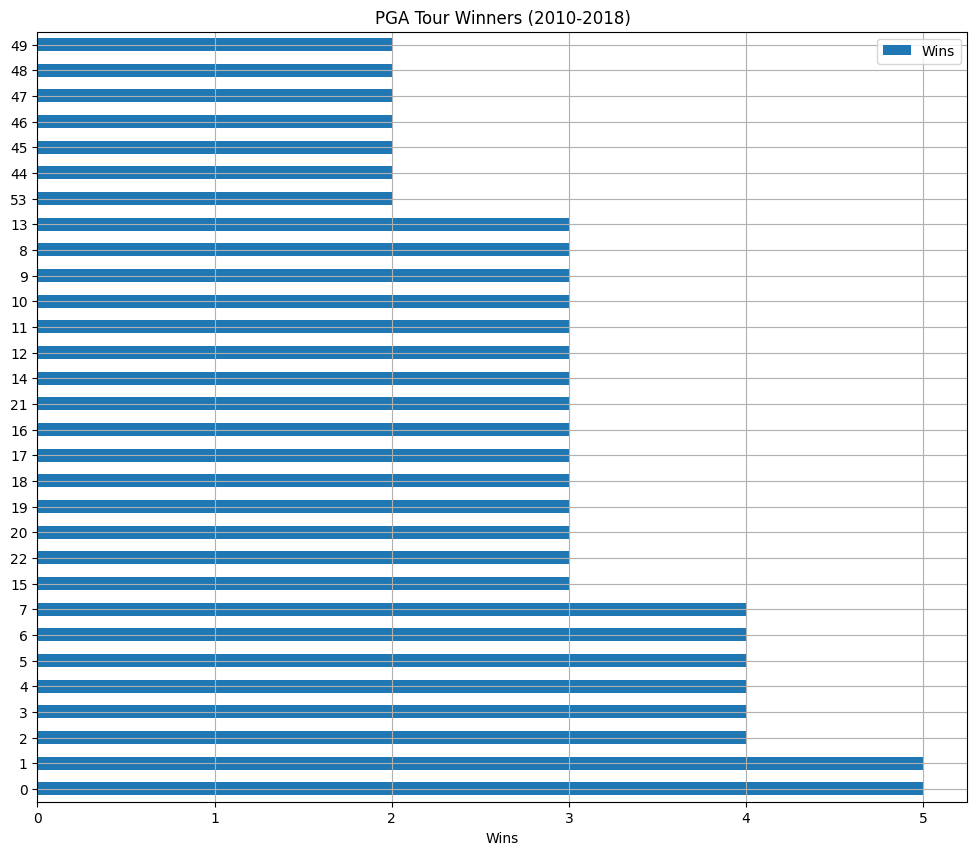

In [17]:
top_30_df_PGA_king.plot(kind="barh",figsize=(12, 10), title='PGA Tour Winners (2010-2018)', xlabel="Wins", grid=True)

verdict: sns is superior to matplotlib caz im still a noob

In [18]:
# Bar garph using Seaborn
df_PGA_king = df_1.loc[df_1['Wins'] == 1, ['Player Name']].value_counts().reset_index(name='Wins')      # type DataFrame
top_30_df_PGA_king = df_PGA_king.head(30)
top_30_df_PGA_king.head()

,Player Name,Wins
0,Dustin Johnson,5
1,Brandt Snedeker,5
2,Bill Haas,4
3,Adam Scott,4
4,Scott Piercy,4


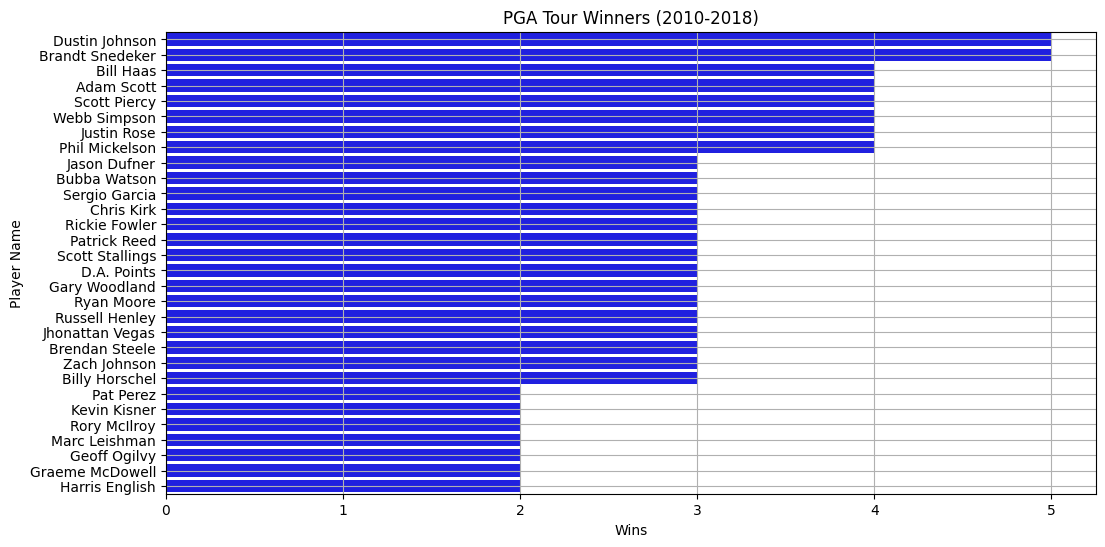

In [19]:
plt.figure(figsize=(12, 6))
sns.barplot(x="Wins", y="Player Name", data=top_30_df_PGA_king, color="b")
plt.title('PGA Tour Winners (2010-2018)')
plt.grid(True)

## Exploring the Money Making Machines

In [20]:
distance = df[['Year', 'Player Name', 'Money']].copy()
distance.sort_values(by='Money', inplace=True, ascending=False)
distance.head()

,Year,Player Name,Money
647,2015,Jordan Spieth,12030465.0
361,2017,Justin Thomas,9921560.0
303,2017,Jordan Spieth,9433033.0
729,2015,Jason Day,9403330.0
520,2016,Dustin Johnson,9365185.0


In [21]:
sns.scatterplot(x = 'Wins', y = 'Money', data = df_1, ax=axs[1,0], color = 'green', alpha=0.50, edgecolor = 'black')
sns.regplot(x = 'Wins', y = 'SG:OTT', data = df_1, scatter=False, ax=axs[1,0], color = 'yellow')
axs[1,0].set_ylim(-2.0, 2.0)
axs[1,0].set_ylabel("Money")

plt.show()

NameError: name 'axs' is not defined

## Exploring the Longest Hitters (Bombs)

In [ ]:
distance = df[['Year', 'Player Name', 'Avg Distance']].copy()
distance.sort_values(by='Avg Distance', inplace=True, ascending=False)
distance.head()

,Year,Player Name,Avg Distance
162,2018,Rory McIlroy,319.7
1481,2011,J.B. Holmes,318.4
174,2018,Trey Mullinax,318.3
732,2015,Dustin Johnson,317.7
350,2017,Rory McIlroy,316.7


## Distribution of the Data

In [ ]:
'''
# We will not plot 'Player Name' as it  
df_2= distribution = df.loc[:, df.columns != 'Player Name'].columns
print(df_2)
print(type(df_2))
'''

"\n# We will not plot 'Player Name' as it  \ndf_2= distribution = df.loc[:, df.columns != 'Player Name'].columns\nprint(df_2)\nprint(type(df_2))\n"

the mistake here is that it is df_2 is stored as an index. it needs to be a DataFrame

In [ ]:
# We will not plot 'Player Name' as it 
df_2 = df.loc[:, df.columns != 'Player Name']
print(df_2.columns)
print(type(df_2))

Index(['Rounds', 'Fairway Percentage', 'Year', 'Avg Distance', 'gir',
       'Average Putts', 'Average Scrambling', 'Average Score', 'Points',
       'Wins', 'Top 10', 'Average SG Putts', 'Average SG Total', 'SG:OTT',
       'SG:APR', 'SG:ARG', 'Money'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>


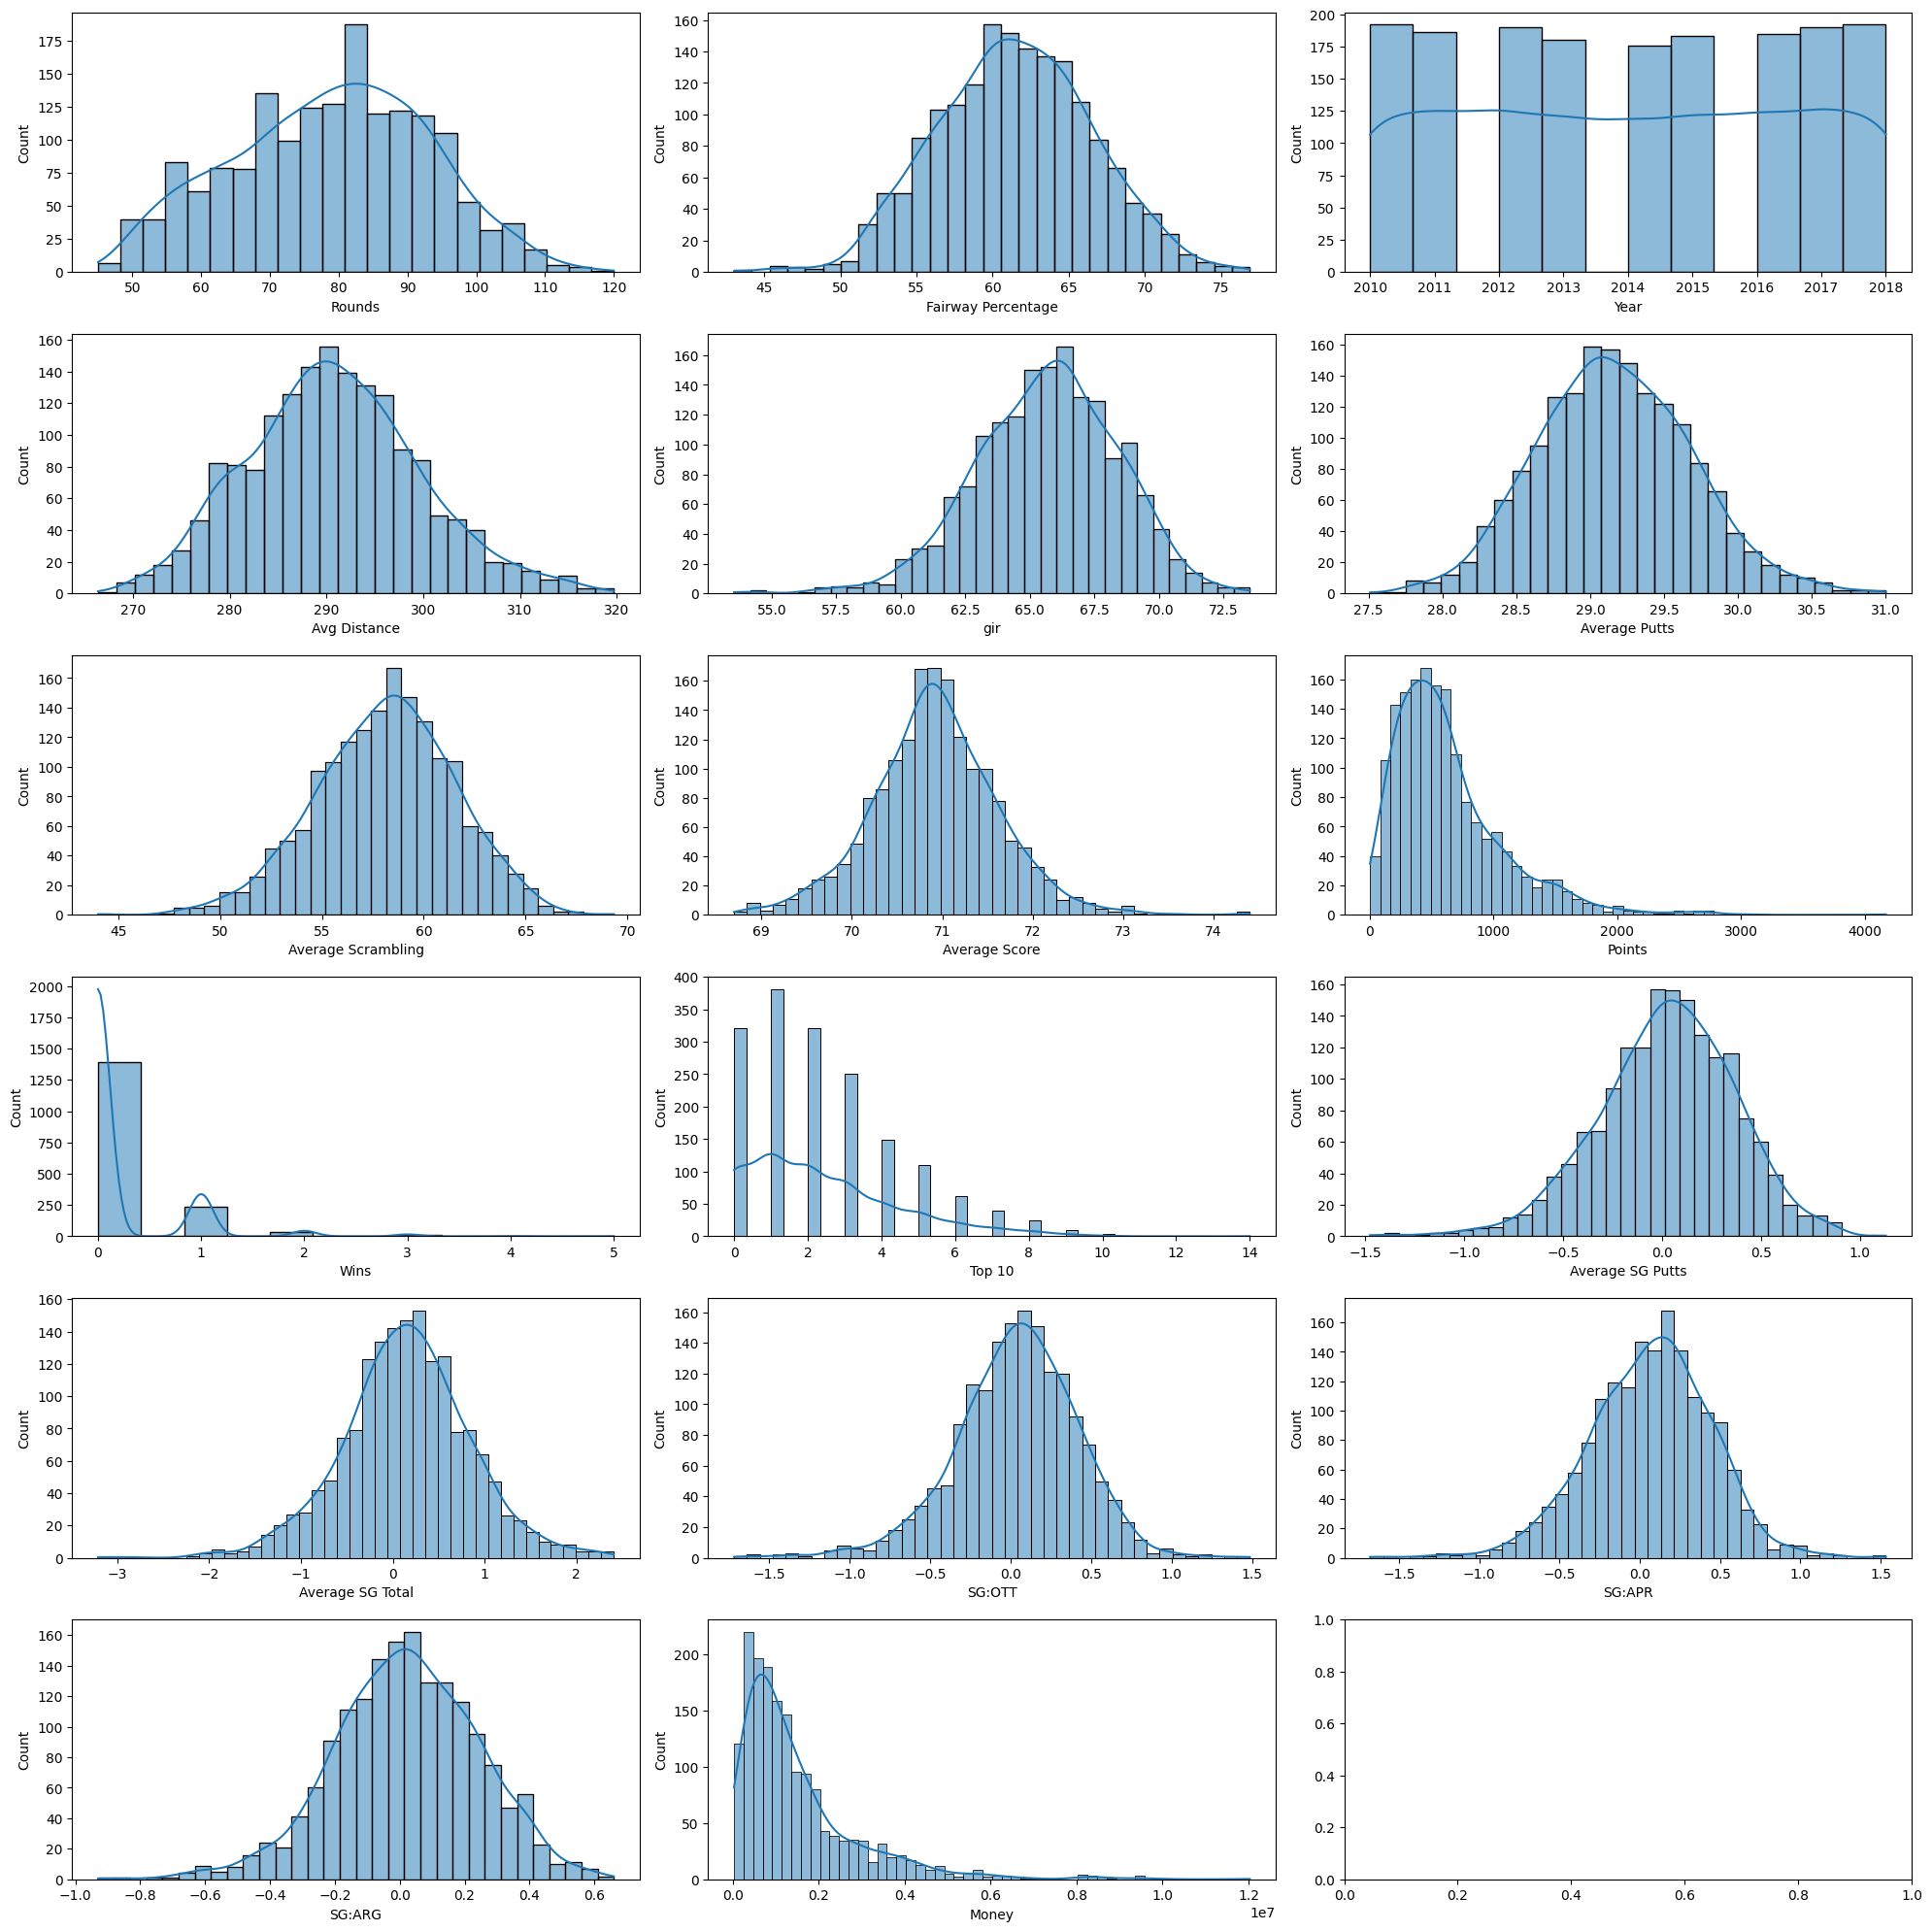

In [ ]:
fig, axs = plt.subplots(nrows=6, ncols=3, figsize=(20, 20))

rows = 0
cols = 0

for i, column in enumerate(df_2):
    sns.histplot(df[column], ax=axs[rows][cols], kde=True, line_kws={'color': 'r'})
    axs[rows][cols].set_xlabel(column)
    cols += 1
    if cols == 3:
        cols = 0
        rows += 1

plt.tight_layout()
plt.show()

From the distributions plotted, It appears that most of the graphs are normally distributed. However, we can observe that Money, Points, Wins, and Top 10s tend to are all skewed to the right. This could be explained by the separation of the best players and the average PGA Tour player. The best players have multiple placings in the Top 10 with wins that allows them to earn more from tournaments, while the average player will have no wins and only a few Top 10 placings that prevent them from earning as much.

## Are there relationships between pairs of metrics?

### Correlation plots

In [ ]:
df_2.shape

(1674, 17)

<Axes: >

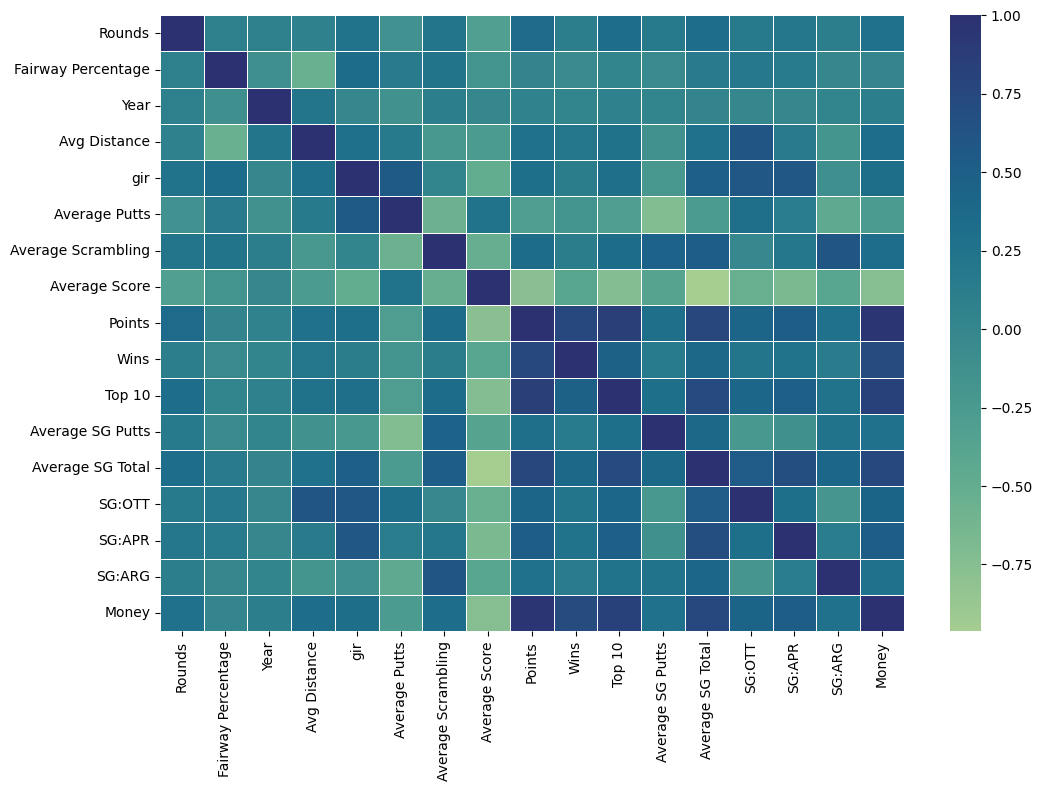

In [ ]:
plt.figure(figsize = (12, 8))
sns.heatmap(df_2.corr(), cmap='crest', linewidth=.5)

looks like swimming pool tiles HAHAHA

<Axes: >

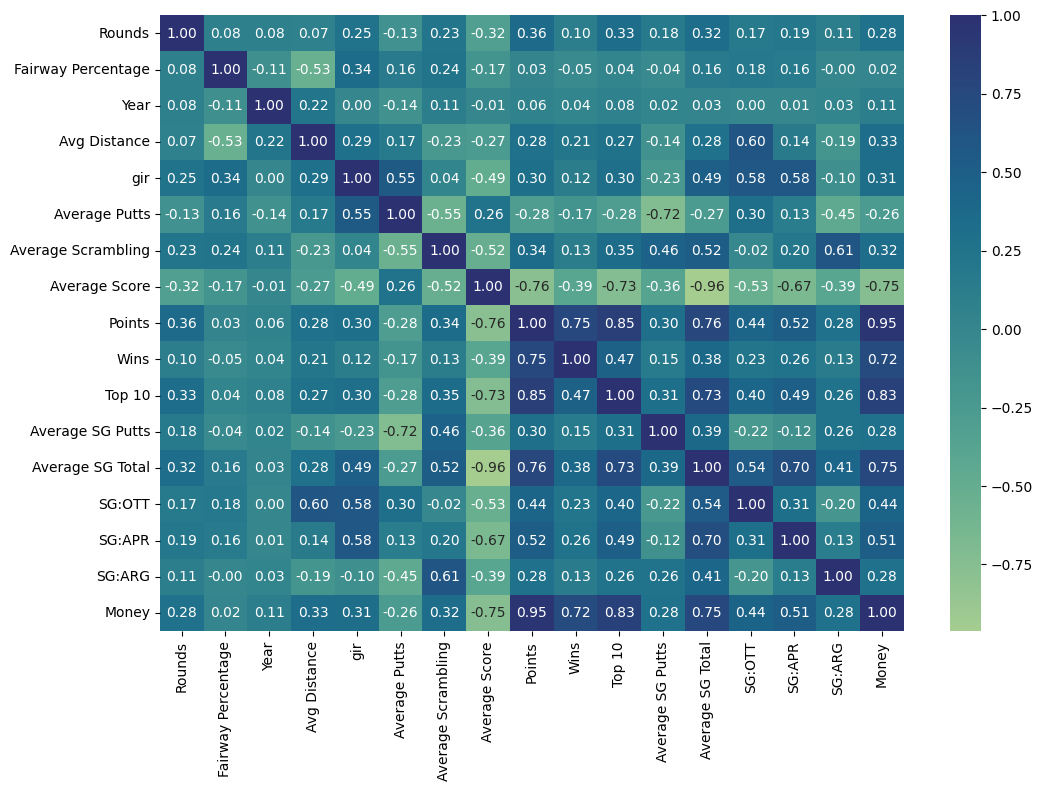

In [ ]:
plt.figure(figsize = (12, 8))
sns.heatmap(df_2.corr(), annot = True, fmt = '.2f', cmap = 'crest')

## Which shot type contributes most to Wins

### Challenging conventional wisdom: "Putt for dough"

### Traditional Metrics

In [ ]:
tfeatures =  ["Fairway Percentage", "Avg Distance", "gir", "Average Putts", "Average Scrambling"]

<Axes: xlabel='Wins', ylabel='Average Putts'>

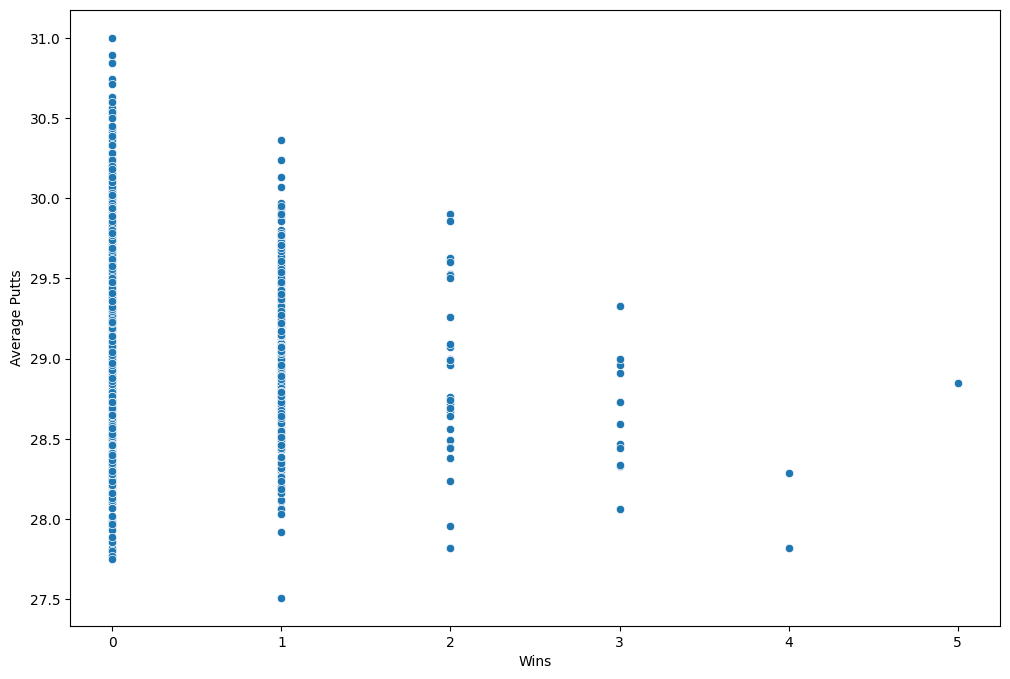

In [ ]:
plt.figure(figsize = (12, 8))
sns.scatterplot(y=df['Average Putts'], x=df['Wins'])

<Axes: xlabel='Wins', ylabel='Avg Distance'>

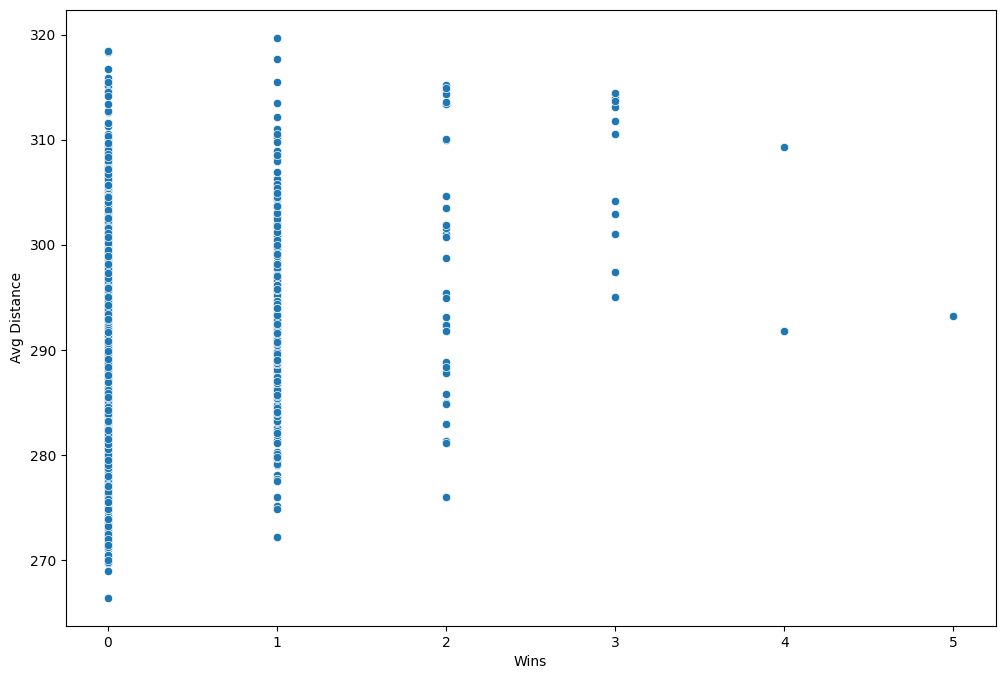

In [ ]:
plt.figure(figsize = (12, 8))
sns.scatterplot(y=df['Avg Distance'], x=df['Wins'])

How much each stroke contributes to Wins is unclear

Quality of stroke cannot be determined
<ul>story of each put is unknown - we don't know if the decision was optimal(? can we even be traced to decison making.. lets stick to execution for now)</ul>
<ul>texas wedge counted? or are these putts stickly on the green</ul>

Difficulty of shot cannot be determined, consequently outcome of shot as well
<ul>great shot out of a poor lie?</ul>
<ul>how much of the shots were of the best situation</ul>

Can we infer anything about strategies emplored by winner? can we read btw the data nahimsayin

We need a metric that can pit the different shot types against each other
<ul>quality - can every shot be quantified by all others?</ul>
<ul>contribution to wins</ul>

### Just how much more robust are Modern Day Metrics? 

### Strokes Gained 

In [ ]:
sgfeatures = ["Average SG Putts", "Average SG Total", "SG:OTT", "SG:APR", "SG:ARG"]

<Axes: xlabel='Wins', ylabel='SG:APR'>

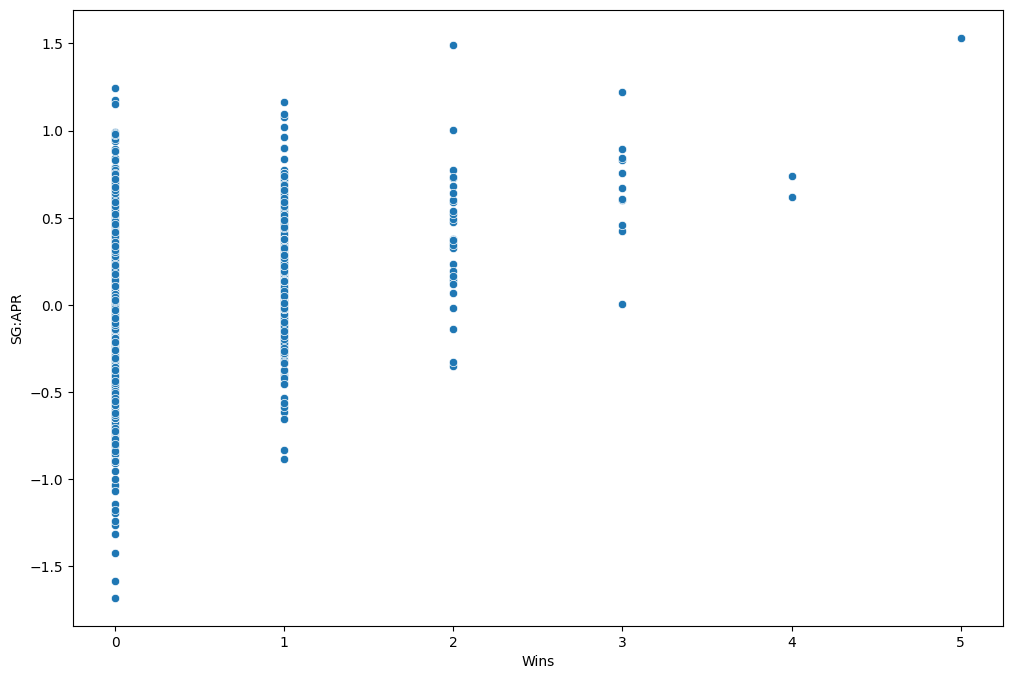

In [ ]:
plt.figure(figsize = (12, 8))
sns.scatterplot(y=df['SG:APR'], x=df['Wins'])

<Axes: xlabel='Wins', ylabel='SG:ARG'>

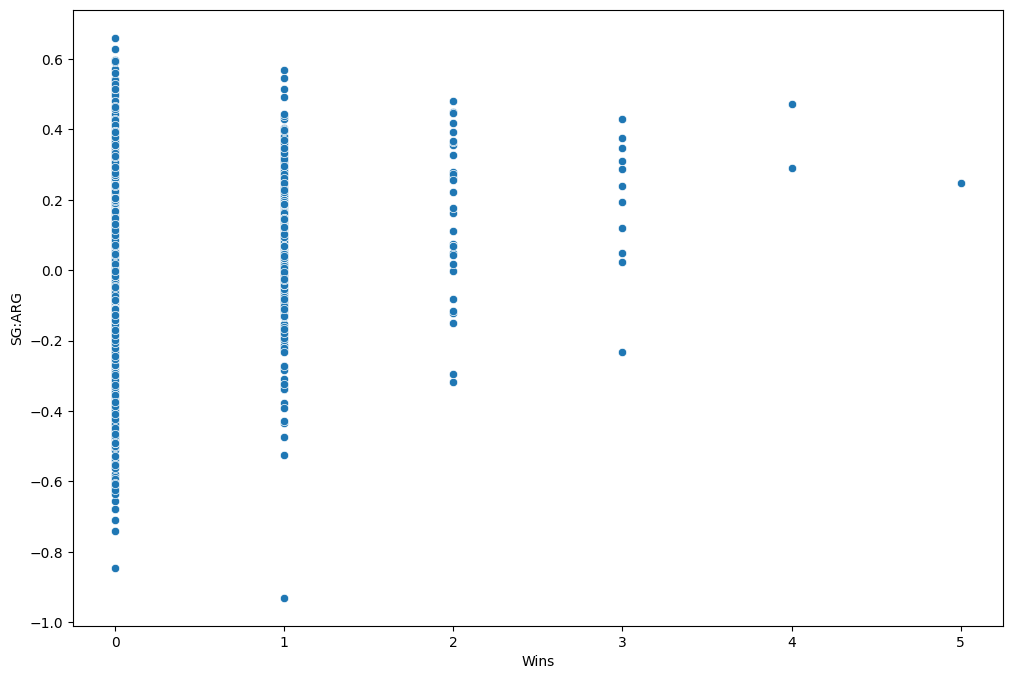

In [ ]:
plt.figure(figsize = (12, 8))
sns.scatterplot(y=df['SG:ARG'], x=df['Wins'])

<Axes: xlabel='Wins', ylabel='SG:OTT'>

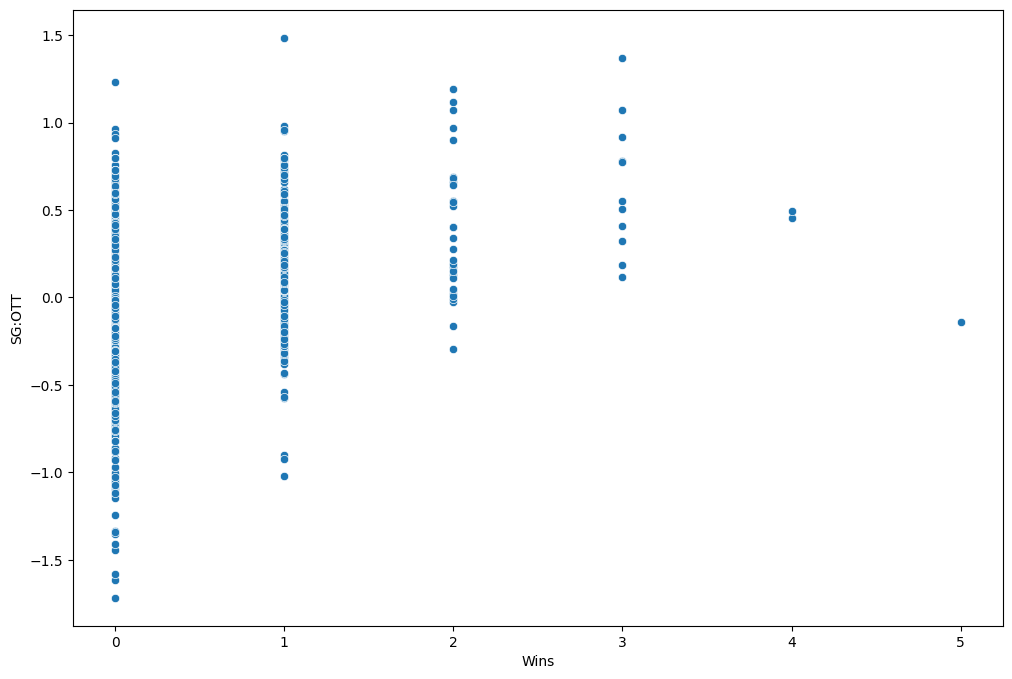

In [ ]:
plt.figure(figsize = (12, 8))
sns.scatterplot(y=df['SG:OTT'], x=df['Wins'])

Generally higher Strokes Gained across all shot types predicted a higher frequency of winners.
But it does not tell us how much of a better metric it is than traditional metrics (Ave Distance and Ave Putts) 

### Is new always better?

## Strokes gained vs Traditional Metrics

### Univariate Analysis

Average Score UA

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

sns.scatterplot(x = 'Average Score', y = 'SG:APR', data = df_1, ax=axs[0,0], color = 'green', alpha=0.50, edgecolor = 'black')
sns.regplot(x = 'Average Score', y = 'SG:APR', data = df_1, scatter=False, ax=axs[0,0], color = 'yellow')
axs[0,0].set_ylim(-2.0, 2.0)
axs[0,0].set_ylabel("Strokes Gained - Approach")

sns.scatterplot(x = 'Average Score', y = 'Average SG Putts', data = df_1, ax=axs[0,1], color = 'red', alpha=0.50, edgecolor = 'black')
sns.regplot(x = 'Average Score', y = 'Average SG Putts', data = df_1, scatter=False, ax=axs[0,1], color = 'yellow')
axs[0,1].set_ylim(-2.0, 2.0)
axs[0,1].set_ylabel("Strokes Gained - Average Putts")

sns.scatterplot(x = 'Average Score', y = 'SG:OTT', data = df_1, ax=axs[1,0], color = 'green', alpha=0.50, edgecolor = 'black')
sns.regplot(x = 'Average Score', y = 'SG:OTT', data = df_1, scatter=False, ax=axs[1,0], color = 'yellow')
axs[1,0].set_ylim(-2.0, 2.0)
axs[1,0].set_ylabel("Strokes Gained - Off The Tee")

sns.scatterplot(x = 'Average Score', y = 'SG:ARG', data = df_1, ax=axs[1,1], color = 'red', alpha=0.50, edgecolor = 'black')
sns.regplot(x = 'Average Score', y = 'SG:ARG', data = df_1, scatter=False, ax=axs[1,1], color = 'yellow')
axs[1,1].set_ylim(-2.0, 2.0)
axs[1,1].set_ylabel("Strokes Gained - Around The Green")

plt.suptitle("Strokes Gained - Short Game Vs Long Game", fontsize=20, fontweight='bold', fontstyle='oblique')

# Save the visualization to a file
plt.savefig("Strokes Gained - Short Game Vs Long Game.png")

plt.show()

In [ ]:
def histogram_boxplot(feature, figsize = (12, 8), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, 
                                           sharex = True, 
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) 
    sns.histplot(feature, ax=ax_hist2, kde=F, bins=bins , color="bright") if bins else sns.histplot(feature, ax=ax_hist2, kde=False, color = 'green')  # For histogram
    ax_hist2.axvline(np.mean(feature), color='red', linestyle='--')  # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-')  # Add median to the histogram

    sns.boxplot(x=feature, ax=ax_box2, showmeans=True, color='green', orient='v')  # Make boxplot horizontal with orient='v'
    ax_box2.set_xlim(ax_hist2.get_xlim())  # Set the same x-axis limits for the boxplot
    plt.grid()
    ax_box2.xaxis.grid()
    plt.tight_layout()  # Center the graph

c:\Users\ryann\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:1606: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
c:\Users\ryann\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


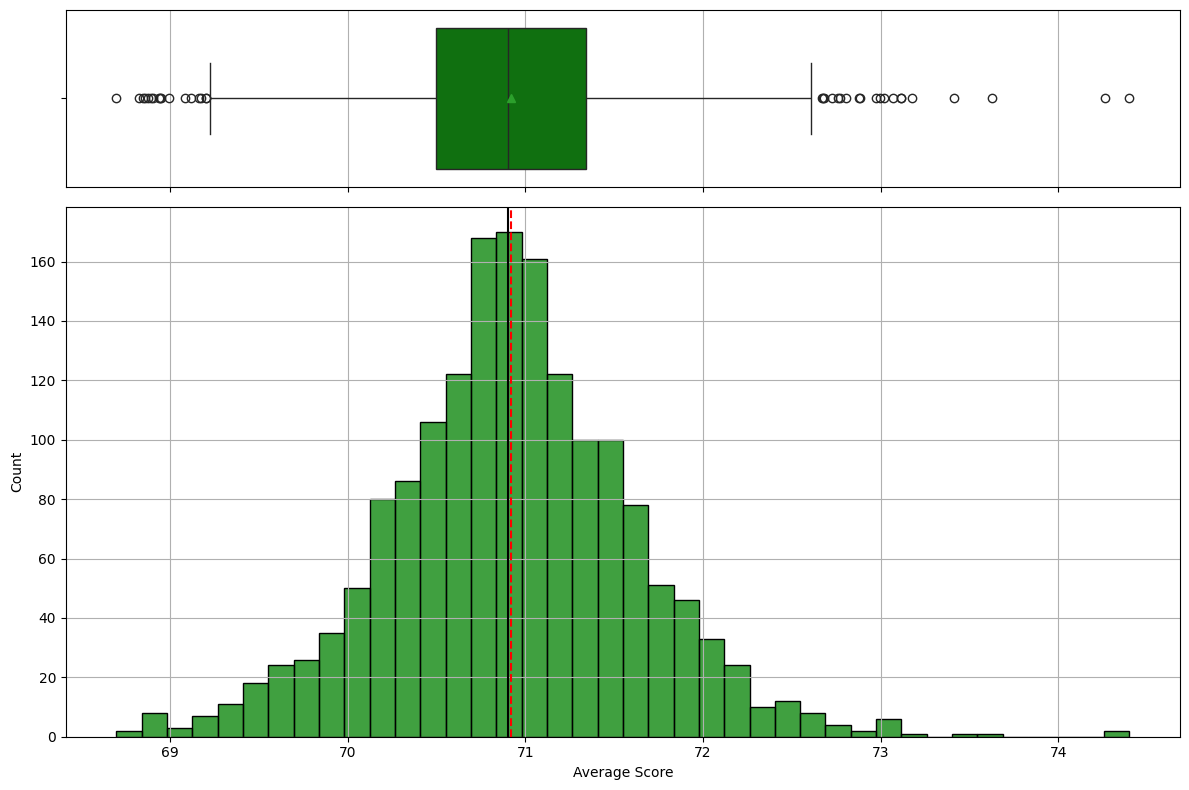

In [ ]:
histogram_boxplot(df_1['Average Score'])

### Traditional Features UA

c:\Users\ryann\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:1606: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
c:\Users\ryann\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\ryann\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:1606: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
c:\Users\ryann\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\ryann\App

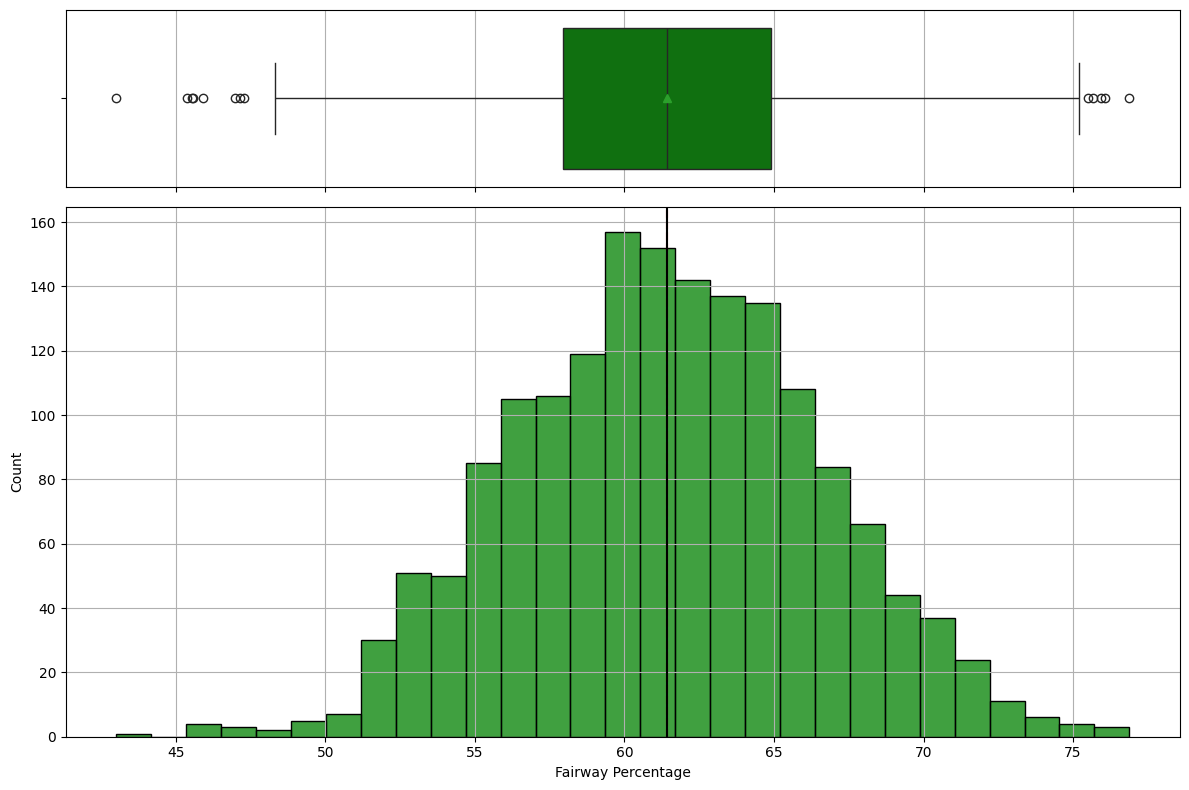

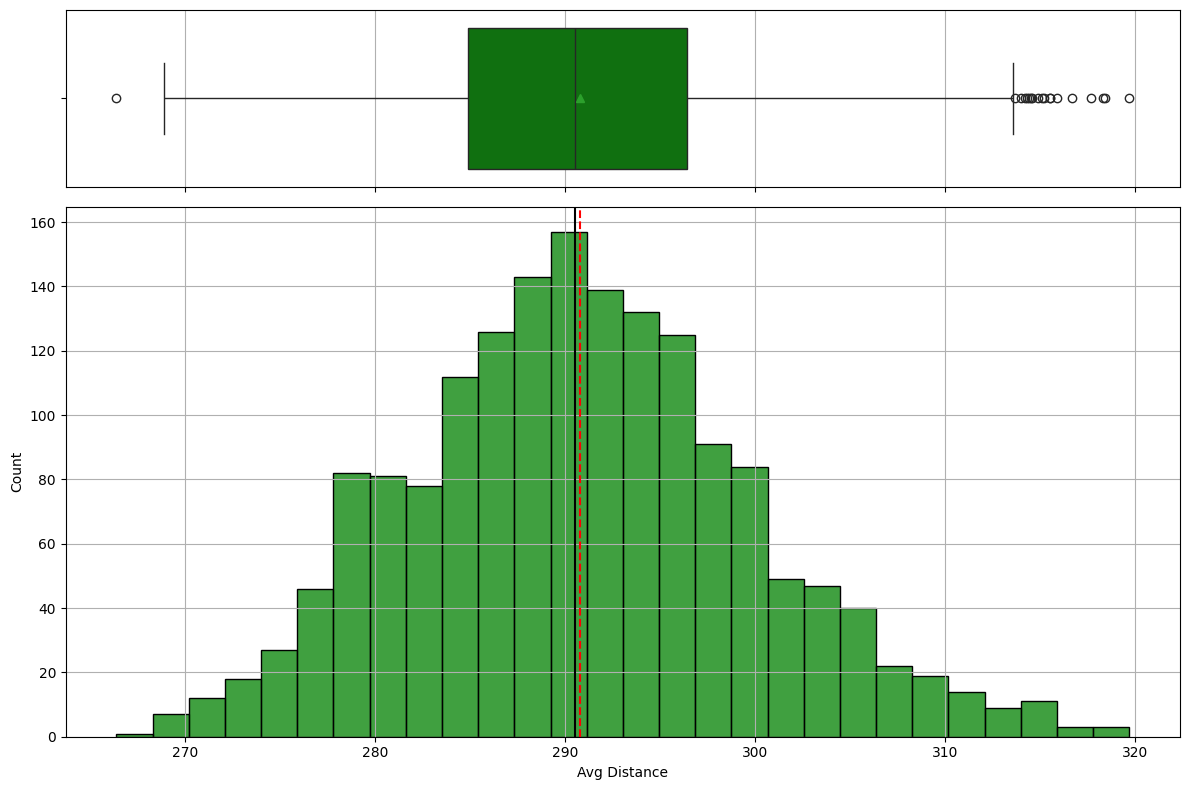

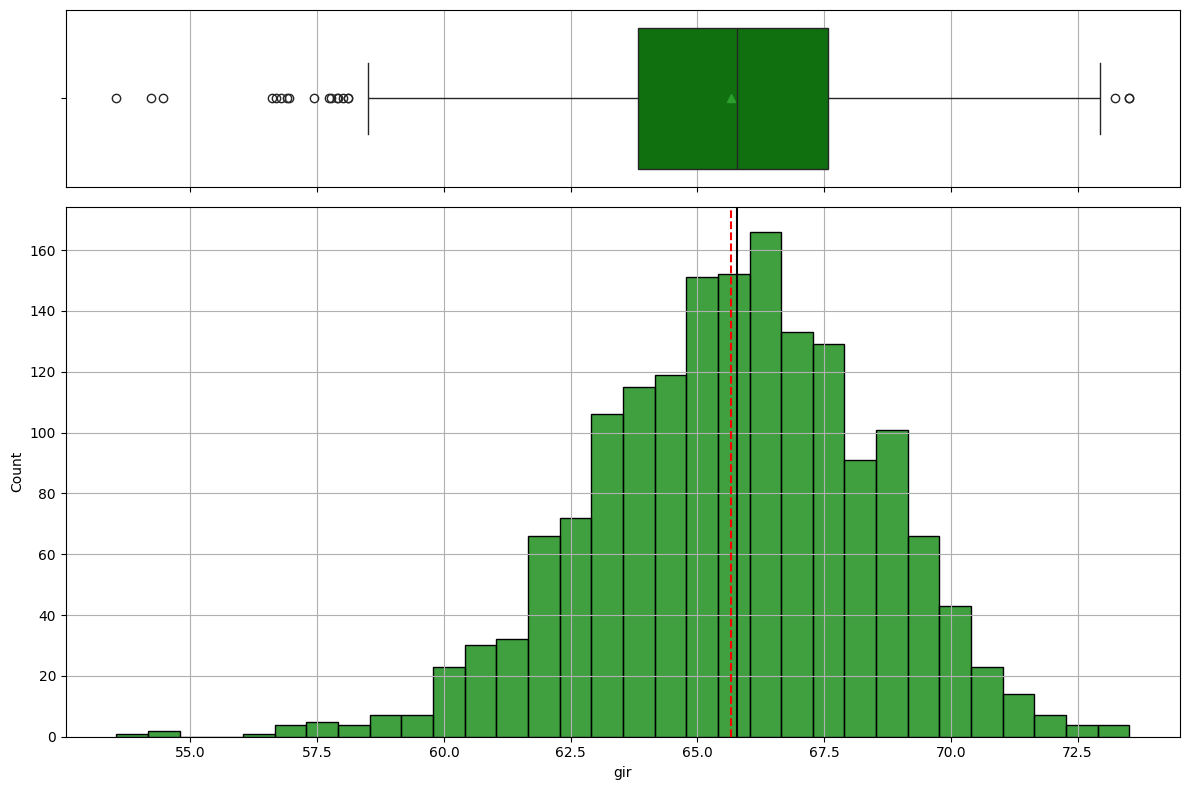

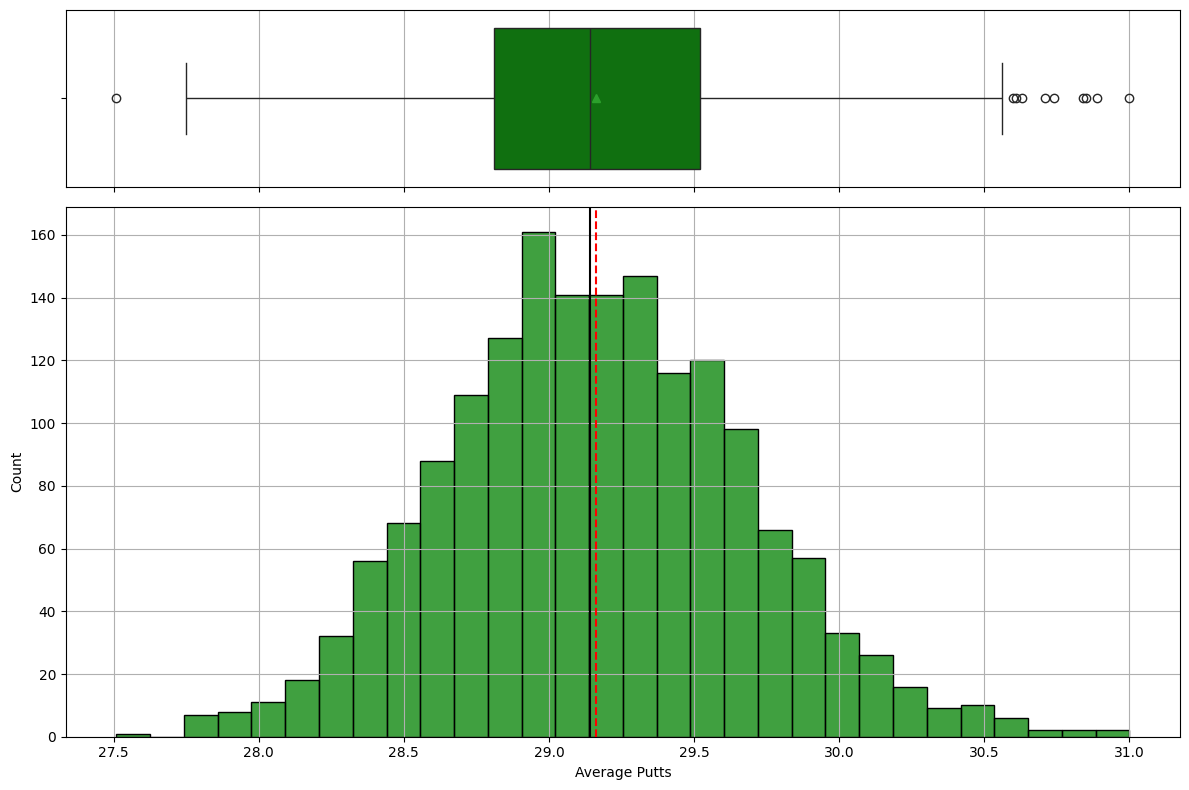

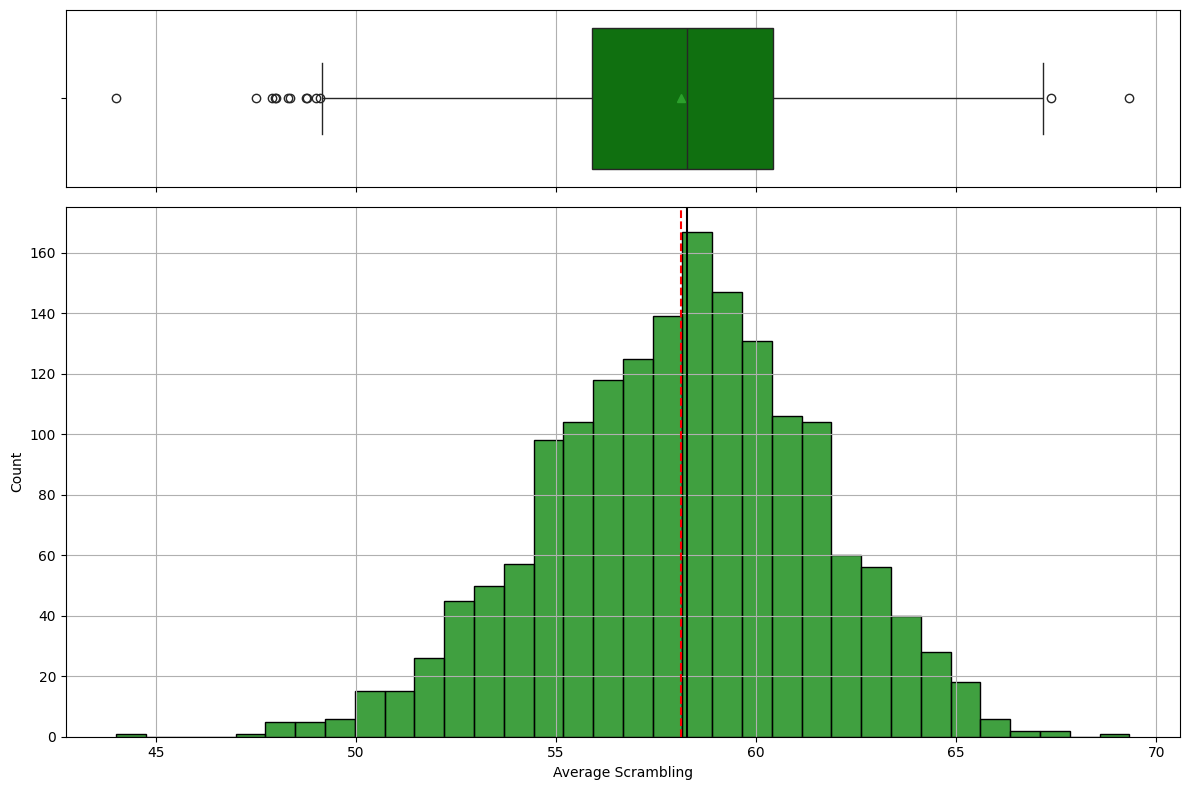

In [ ]:
for feature in tfeatures:
    histogram_boxplot(df_1[feature])

### Strokes Gained Features UA

c:\Users\ryann\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:1606: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
c:\Users\ryann\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\ryann\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:1606: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
c:\Users\ryann\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\ryann\App

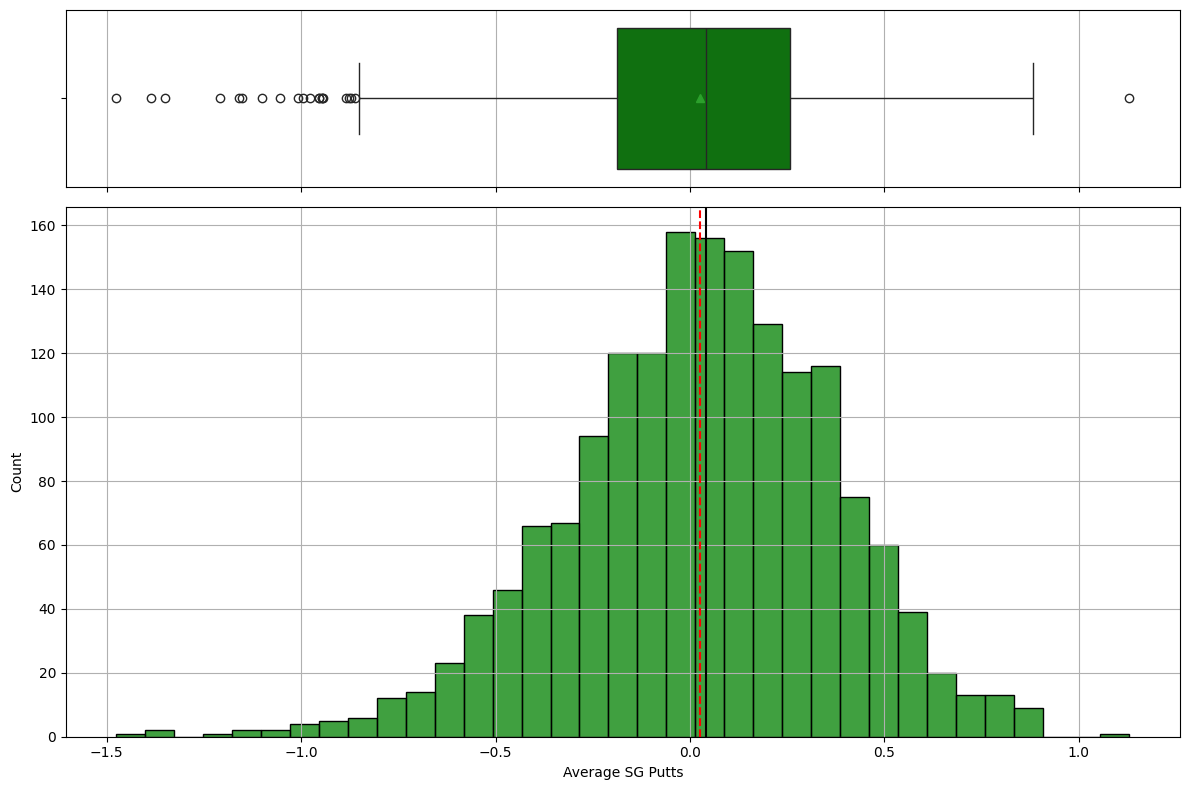

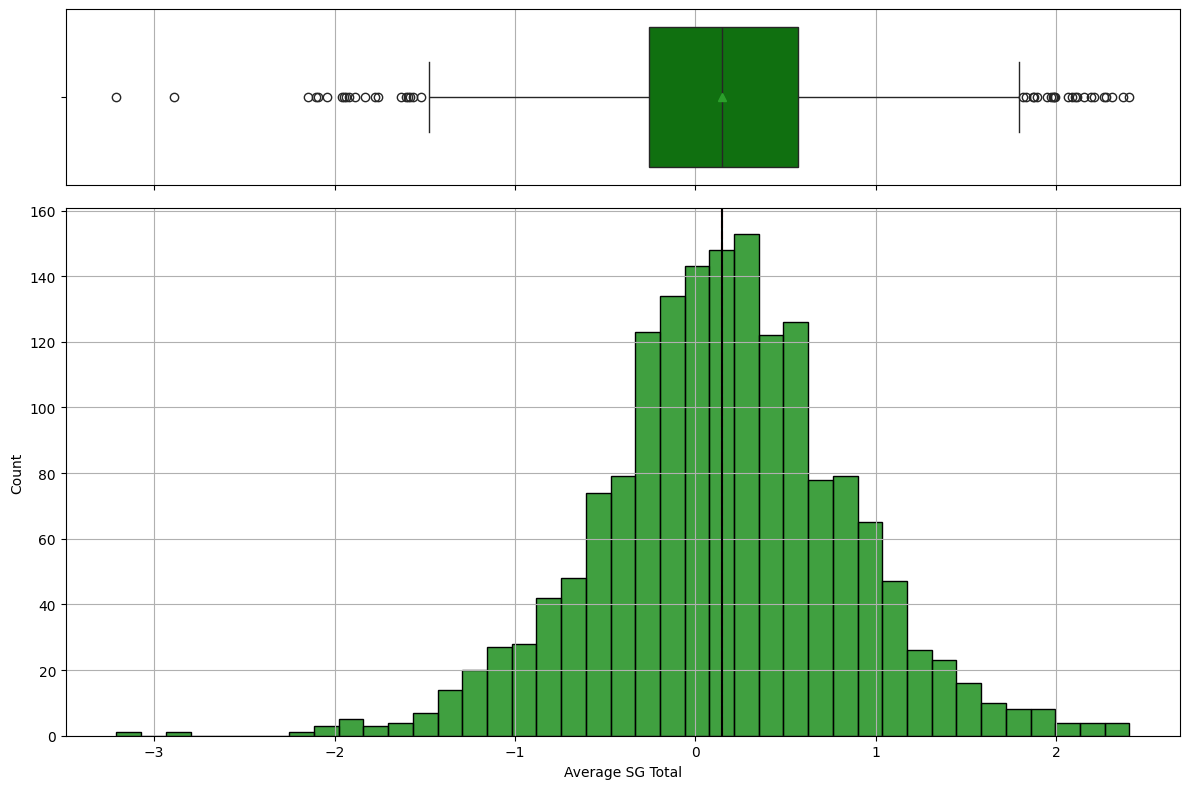

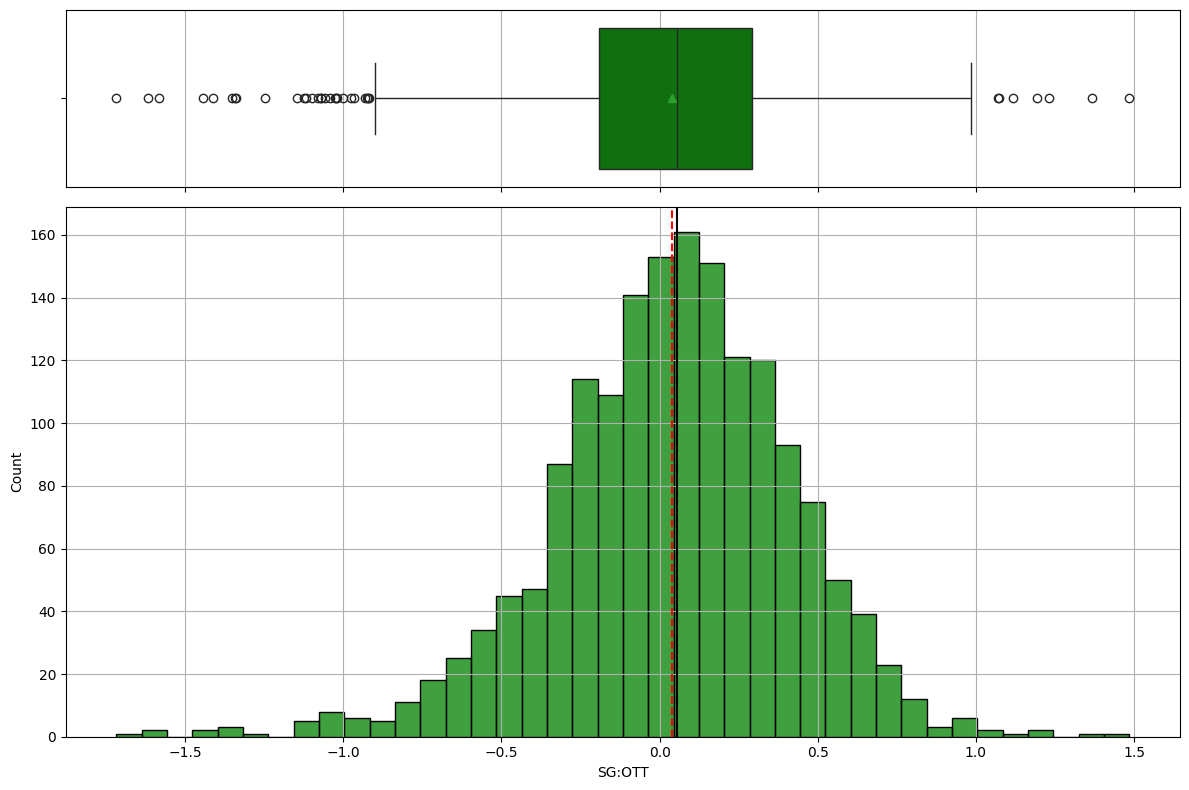

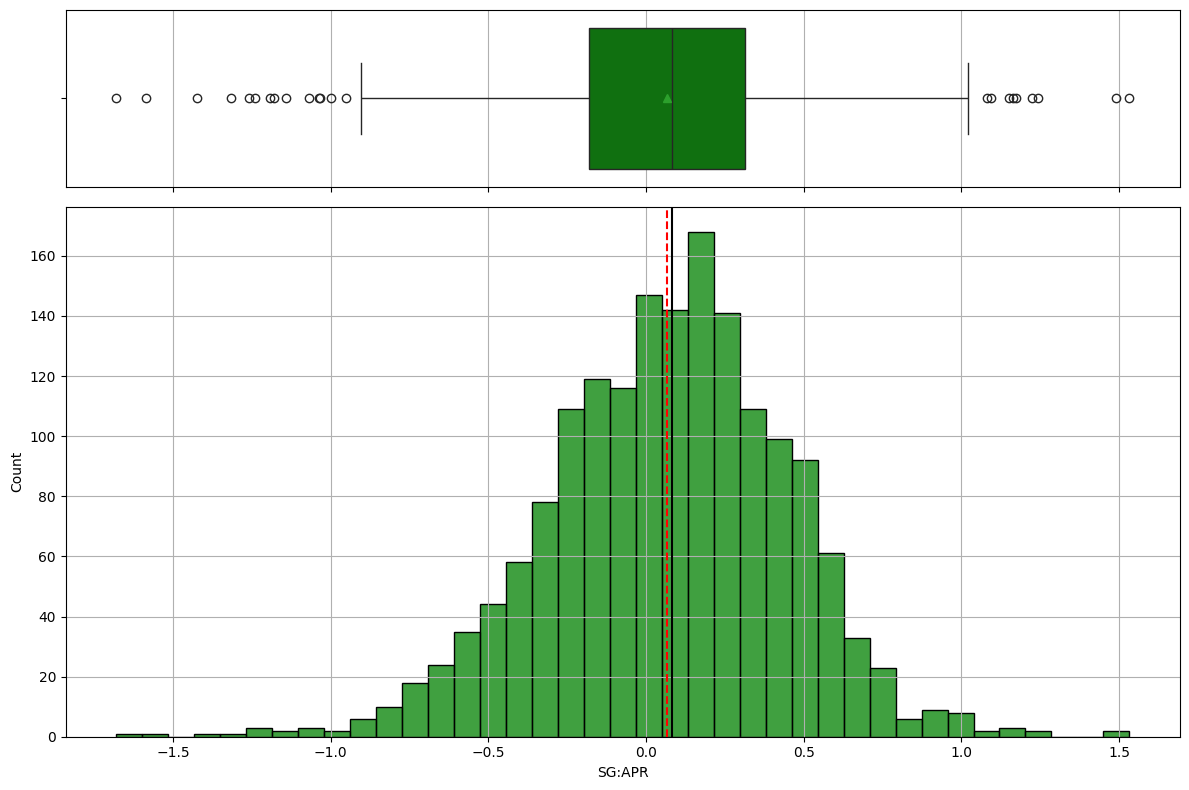

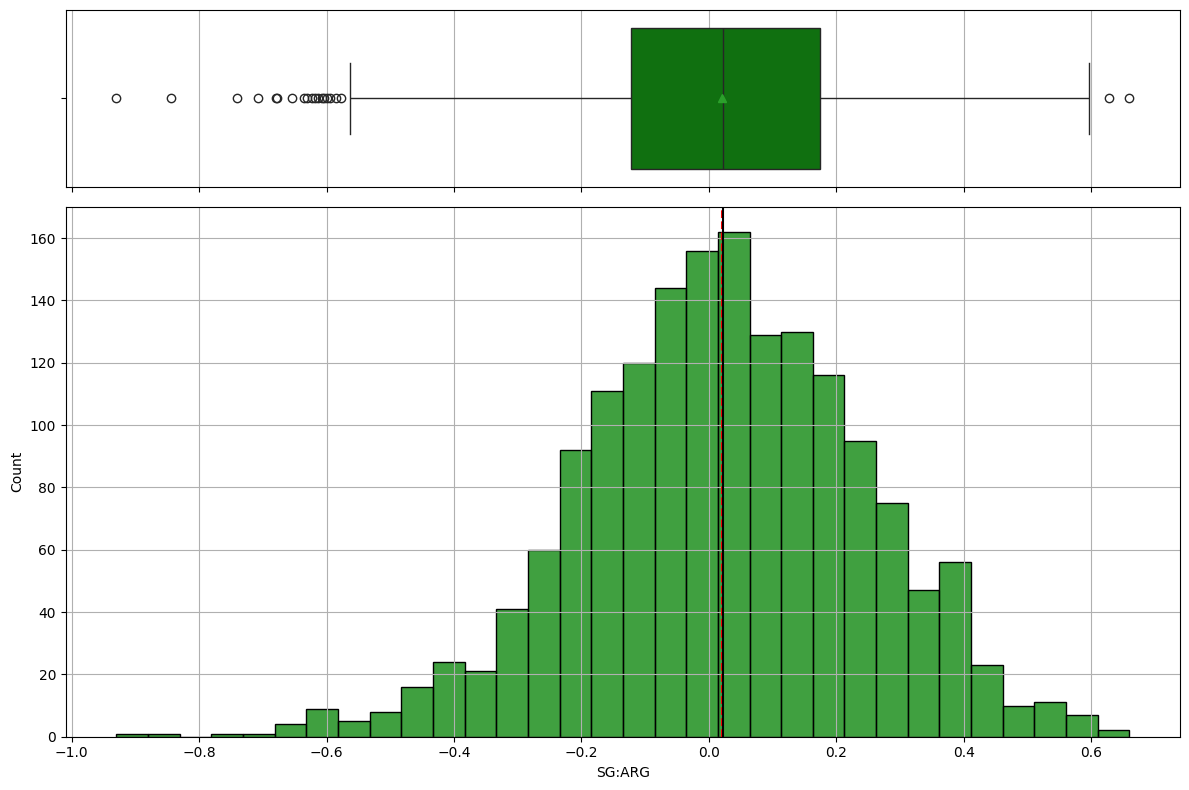

In [ ]:
for feature in sgfeatures:
    histogram_boxplot(df_1[feature])

### Bivariant Analysis

visualise correlation in a heat map  

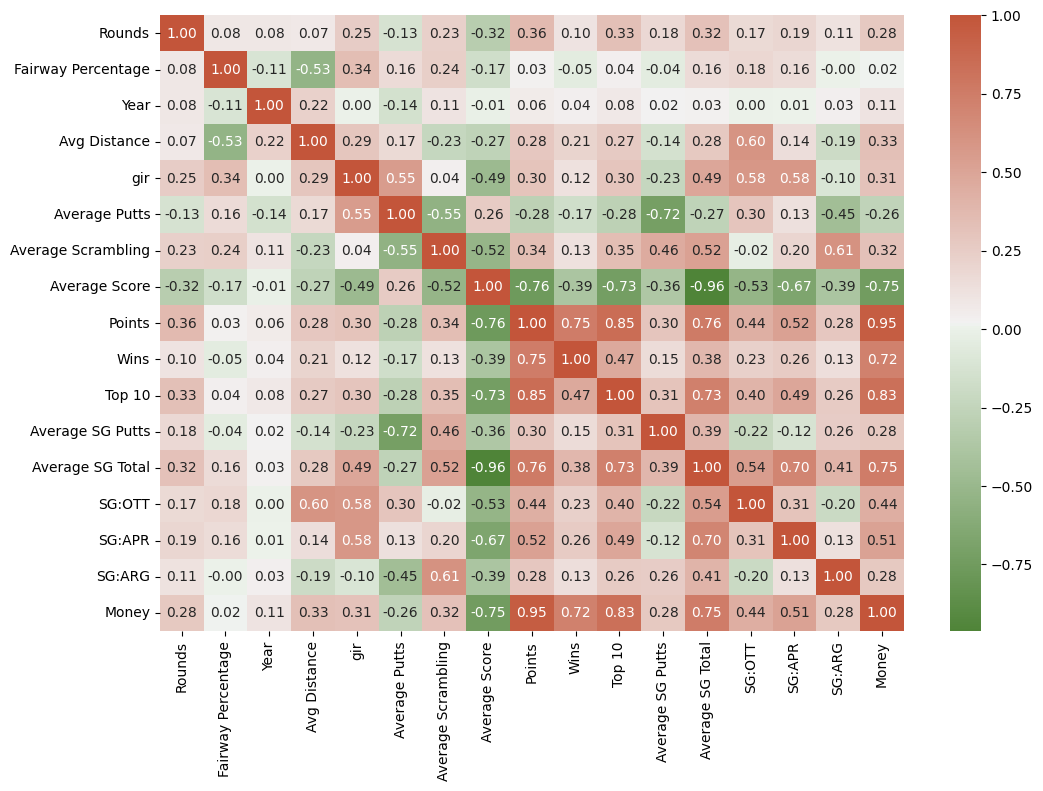

In [ ]:
plt.figure(figsize = (12, 8))
cmap = sns.diverging_palette(120, 20, as_cmap = True)
sns.heatmap(df_2.corr(), annot = True, fmt = '.2f', cmap = cmap)
plt.show()

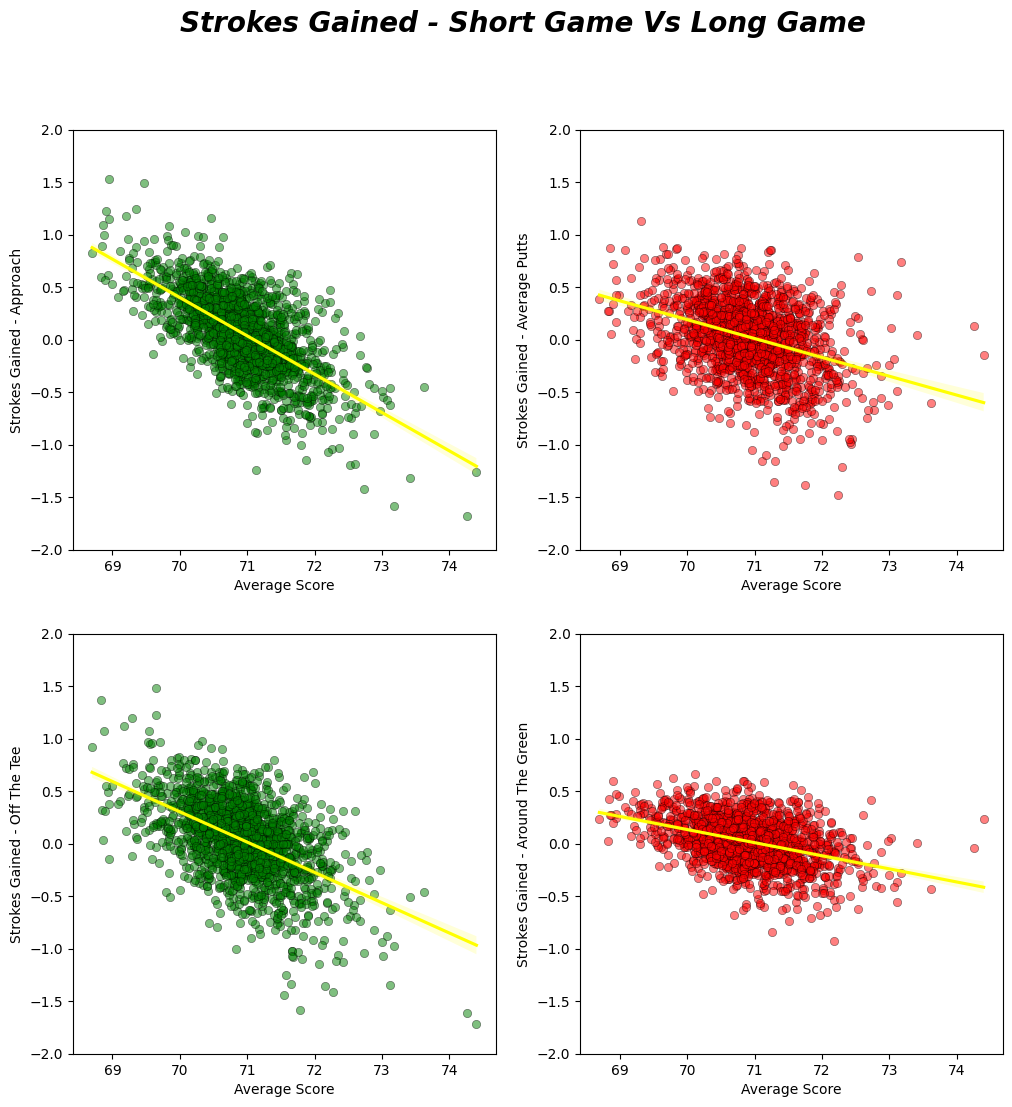

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

sns.scatterplot(x = 'Average Score', y = 'SG:APR', data = df_1, ax=axs[0,0], color = 'green', alpha=0.50, edgecolor = 'black')
sns.regplot(x = 'Average Score', y = 'SG:APR', data = df_1, scatter=False, ax=axs[0,0], color = 'yellow')
axs[0,0].set_ylim(-2.0, 2.0)
axs[0,0].set_ylabel("Strokes Gained - Approach")

sns.scatterplot(x = 'Average Score', y = 'Average SG Putts', data = df_1, ax=axs[0,1], color = 'red', alpha=0.50, edgecolor = 'black')
sns.regplot(x = 'Average Score', y = 'Average SG Putts', data = df_1, scatter=False, ax=axs[0,1], color = 'yellow')
axs[0,1].set_ylim(-2.0, 2.0)
axs[0,1].set_ylabel("Strokes Gained - Average Putts")

sns.scatterplot(x = 'Average Score', y = 'SG:OTT', data = df_1, ax=axs[1,0], color = 'green', alpha=0.50, edgecolor = 'black')
sns.regplot(x = 'Average Score', y = 'SG:OTT', data = df_1, scatter=False, ax=axs[1,0], color = 'yellow')
axs[1,0].set_ylim(-2.0, 2.0)
axs[1,0].set_ylabel("Strokes Gained - Off The Tee")

sns.scatterplot(x = 'Average Score', y = 'SG:ARG', data = df_1, ax=axs[1,1], color = 'red', alpha=0.50, edgecolor = 'black')
sns.regplot(x = 'Average Score', y = 'SG:ARG', data = df_1, scatter=False, ax=axs[1,1], color = 'yellow')
axs[1,1].set_ylim(-2.0, 2.0)
axs[1,1].set_ylabel("Strokes Gained - Around The Green")

plt.suptitle("Strokes Gained - Short Game Vs Long Game", fontsize=20, fontweight='bold', fontstyle='oblique')

# Save the visualization to a file
plt.savefig("Strokes Gained - Short Game Vs Long Game.png")

plt.show()

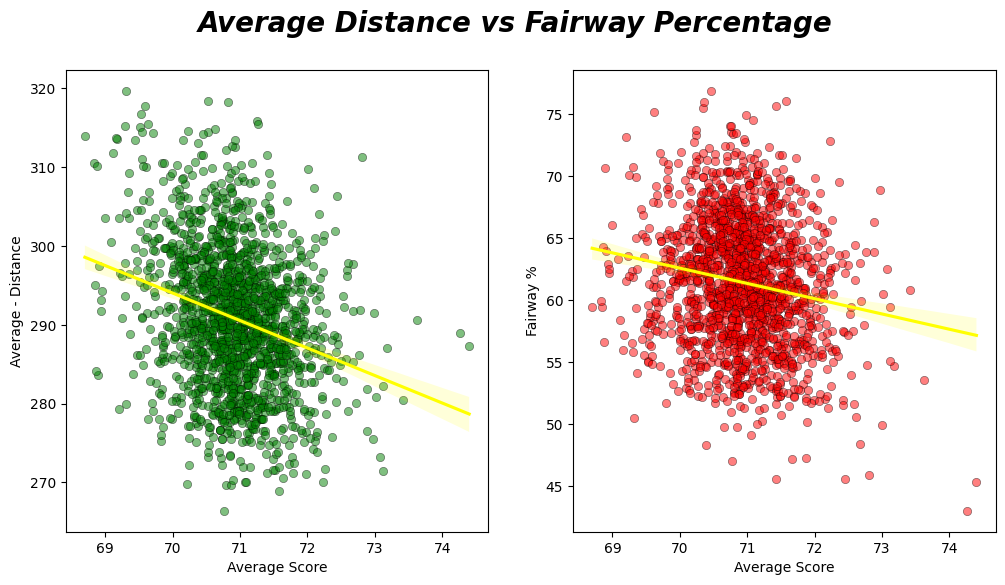

In [ ]:
# Scatterplot to visualize Average Distance vs Fairway Percentage
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

sns.scatterplot(x = 'Average Score', y = 'Avg Distance', data = df_1, ax=axs[0], color = 'green', alpha = 0.5, edgecolor = 'black')
sns.regplot(x = 'Average Score', y = 'Avg Distance', data = df_1, scatter=False, ax=axs[0], color = 'yellow')
axs[0].set(xlabel='Average Score', ylabel='Average - Distance')

sns.scatterplot(x = 'Average Score', y = 'Fairway Percentage', data = df_1, ax=axs[1], color = 'red', alpha = 0.5, edgecolor = 'black')
sns.regplot(x = 'Average Score', y = 'Fairway Percentage', data = df_1, scatter=False, ax=axs[1], color = 'yellow')
axs[1].set(xlabel='Average Score', ylabel='Fairway %')

fig.suptitle("Average Distance vs Fairway Percentage", fontsize=20, fontweight='bold', fontstyle='oblique')

# Save the visualization to a file
plt.savefig("Average Distance vs Fairway Percentage.png")

plt.show()